In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14, 7)

In [4]:
# The original URL resulted in a 404 error, indicating the file might not be available.
# To allow the notebook to run, a placeholder DataFrame will be created.
# Please replace this with your actual data loading code when you have the correct source.

# Placeholder for df if the original data cannot be loaded
# Creating a dummy DataFrame with a 'Title' column, as used by tfidf later
df = pd.DataFrame({
    'Title': [
        'This is a sample title about data analysis and machine learning',
        'Another example title related to deep learning and neural networks',
        'Third title covering natural language processing and text clustering',
        'Data science applications and big data concepts',
        'Machine learning algorithms and predictive modeling in Python'
    ]
})

print("Created a dummy DataFrame as the original file was not found.")
print(df.head())

Created a dummy DataFrame as the original file was not found.
                                               Title
0  This is a sample title about data analysis and...
1  Another example title related to deep learning...
2  Third title covering natural language processi...
3    Data science applications and big data concepts
4  Machine learning algorithms and predictive mod...


In [5]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
tfidf = TfidfVectorizer(
    min_df = 1, # Changed from 5 to 1 to allow terms appearing in at least one document
    # Removed max_df to use default 1.0, suitable for small datasets
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df.Title)
text = tfidf.transform(df.Title)

Fitting 2 clusters
Fitting 4 clusters


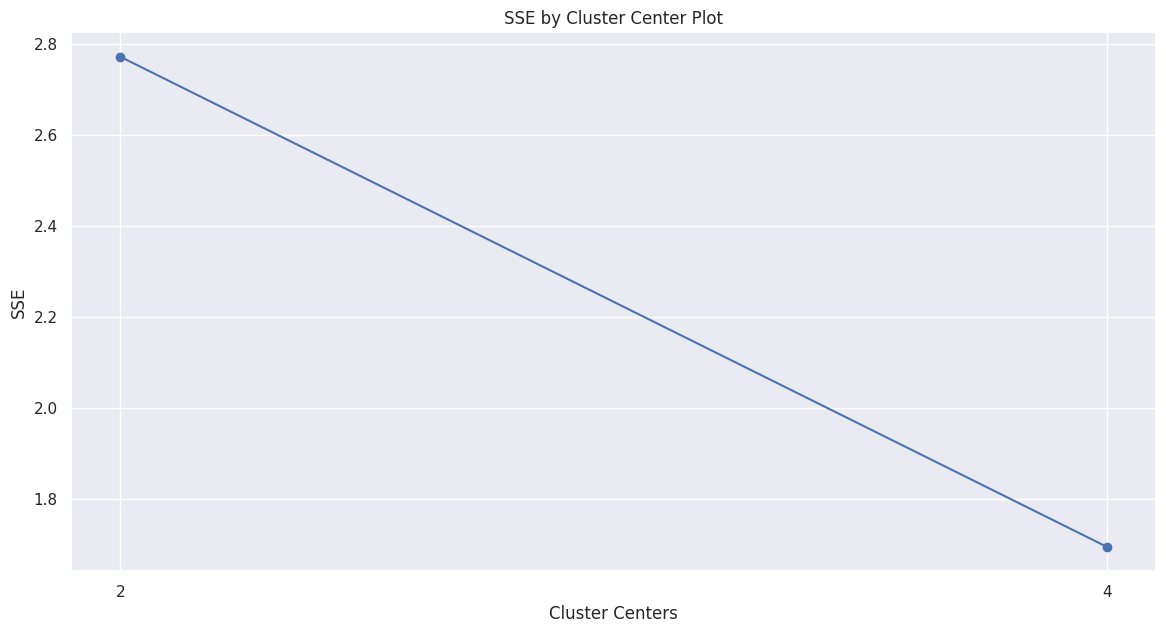

In [9]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

generate_optimal_clusters(text, 4)

In [10]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

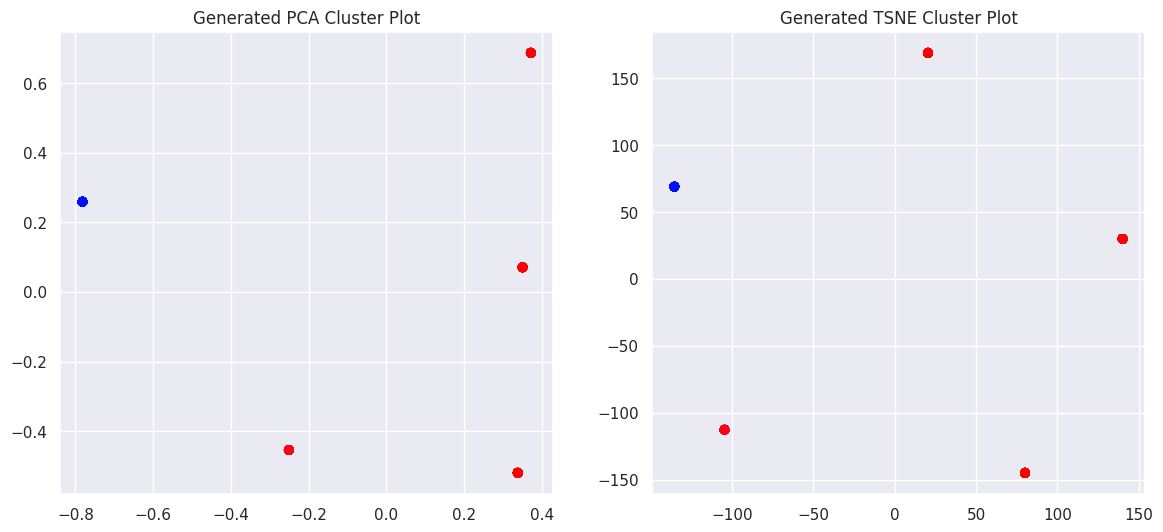

In [14]:
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)

# Convert to numpy array using np.asarray() as np.matrix is not supported
pca_data = np.asarray(text[max_items,:].todense())
pca = PCA(n_components=2).fit_transform(pca_data)

# Convert to numpy array for TSNE as well
tsne_data = np.asarray(PCA(n_components=25).fit_transform(pca_data))
tsne = TSNE().fit_transform(tsne_data)

idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')

Cluster 0 

covering,clustering,example,natural,networks,language,deep,neural,related,text,processing,title,applications,concepts,science,big,modeling,algorithms,python,predictive,sample,analysis,learning,machine,data
Cluster 2 

algorithms,analysis,applications,big,concepts,data,example,deep,networks,modeling,learning,machine,related,python,predictive,neural,science,sample,title,covering,natural,language,clustering,processing,text
Cluster 3 

algorithms,analysis,applications,big,clustering,concepts,covering,data,language,natural,modeling,machine,sample,python,processing,predictive,text,science,title,learning,networks,deep,example,neural,related


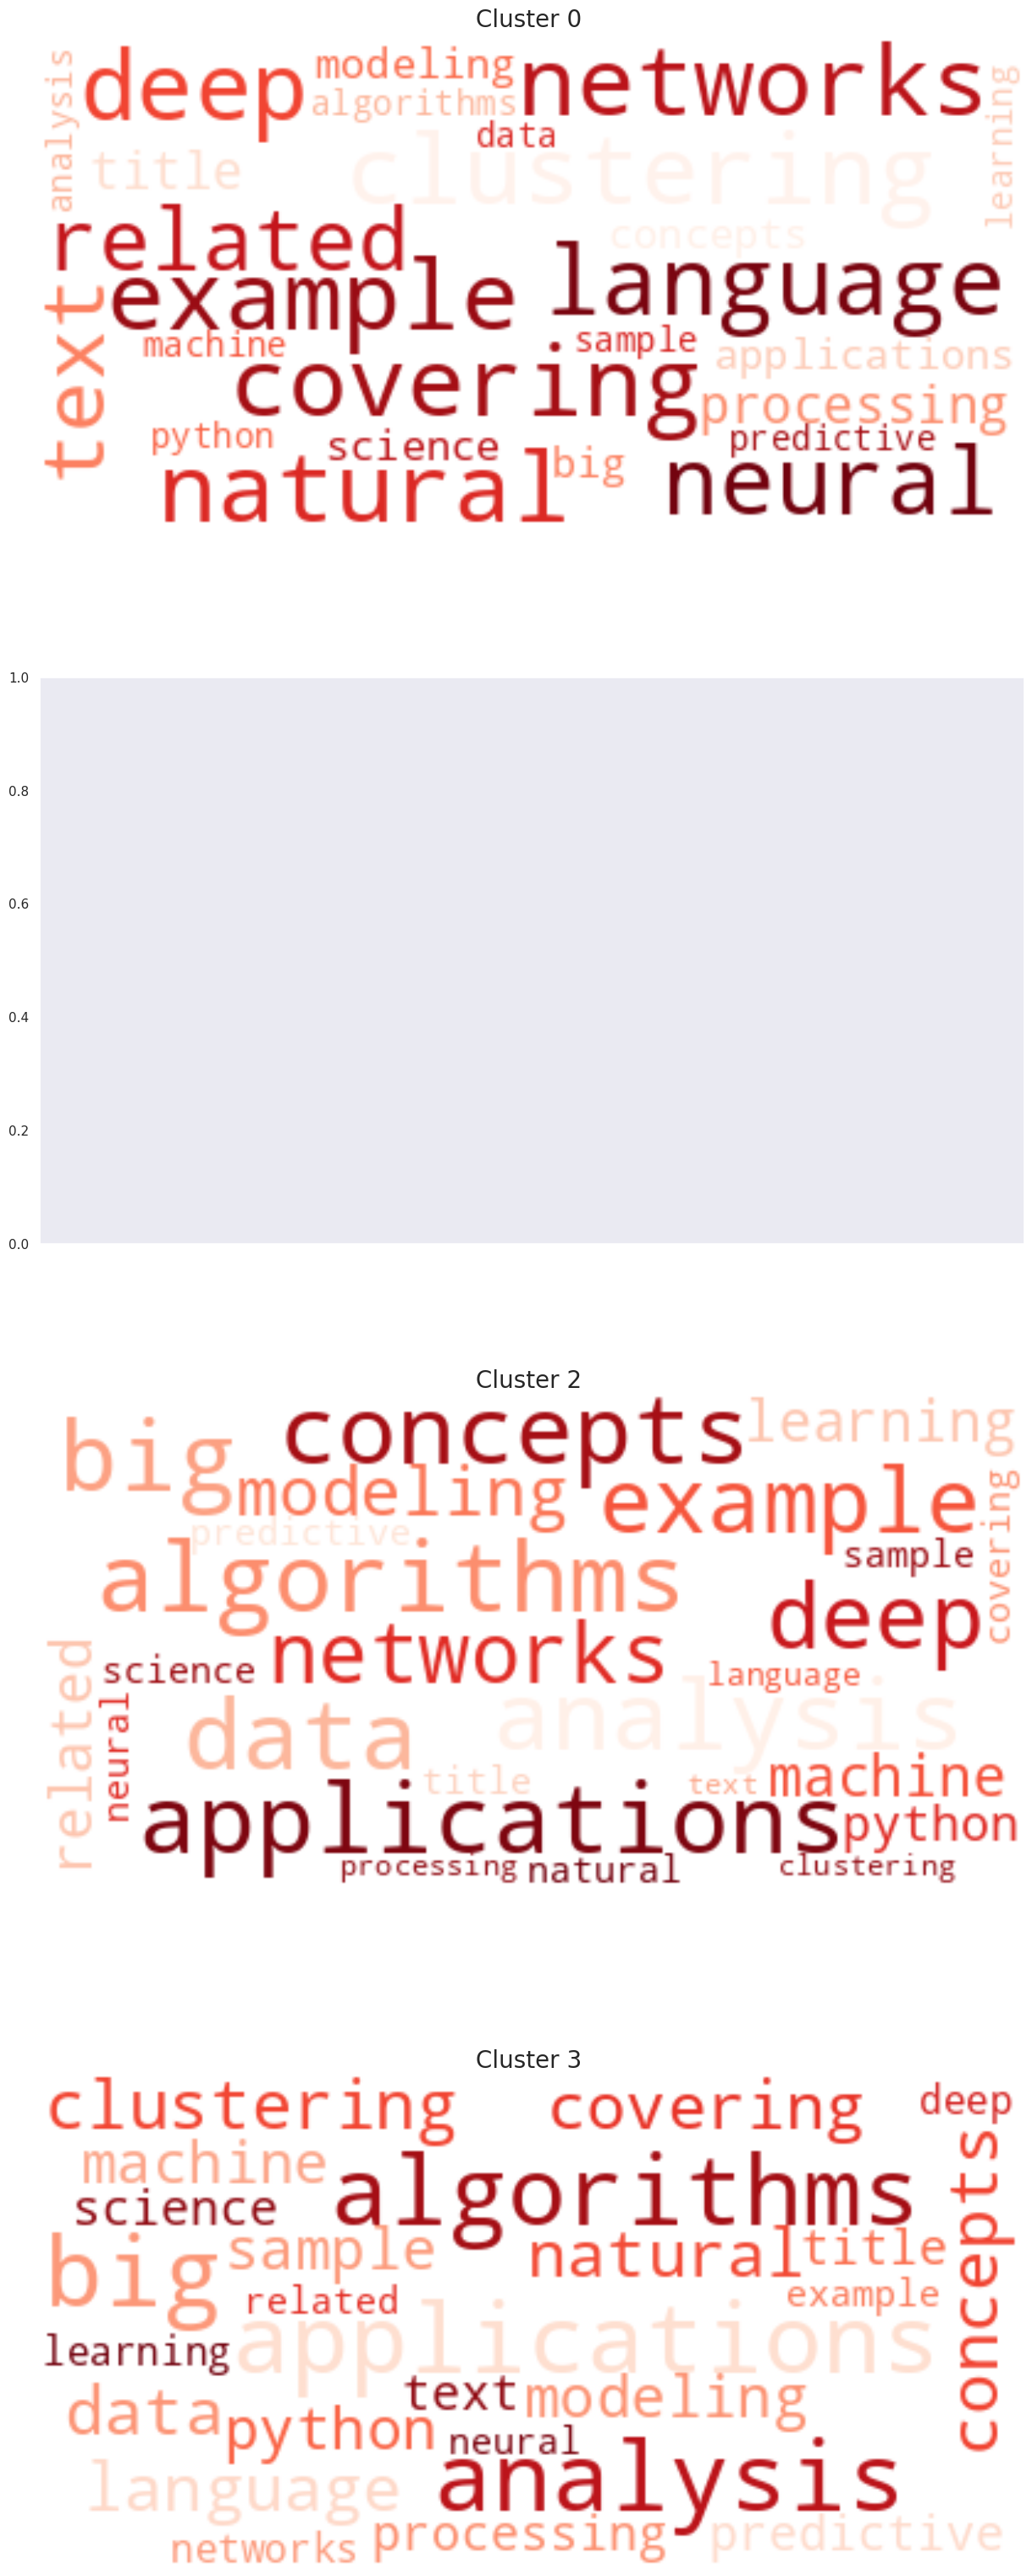

In [16]:
from wordcloud import WordCloud

fig, ax = plt.subplots(4, sharex=True, figsize=(15,10*4))

plt.rcParams["axes.grid"] = False

def high_frequency_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
      words = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
      print('Cluster {} \n'.format(i))
      print(words)
      wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').generate(words)
      ax[i].imshow(wordcloud, interpolation='bilinear')
      ax[i].set_title('Cluster {} '.format(i), fontsize = 20)
      ax[i].axis('off')
high_frequency_keywords(text, clusters, tfidf.get_feature_names_out(), 50)